## **1. Introduction**
Linear regression is a foundational technique in machine learning and statistics. In this notebook, we will implement a simple linear regression model to predict the price of a house based on its size in square meters. By analyzing how the price changes with respect to the size, we aim to derive a linear relationship between the two variables.


In [6]:
# Libraries we'll need
import numpy as np
from matplotlib import pyplot as plt

## **2. Dataset Description**
We will work with a synthetic dataset that contains information about house sizes and their corresponding prices. The dataset is represented as NumPy arrays for efficient computation.

- **Feature (X)**: The size of the house in square meters.
- **Target (y)**: The price of the house in thousands of dollars.


In [100]:
# Create a simple dataset using NumPy arrays
X = np.array([0.5, 0.6, 0.7, 0.8, .9, 1, 1.10, 1.20, 1.30, 1.40])  # Square Meters In Hundreds
y = np.array([150, 250, 210, 270, 400, 380, 330, 360, 390, 420])  # Price in $1000

## **3. Exploratory Data Analysis (EDA)**
In this section, we will visualize the relationship between the size of the house (X) and its price (y). We will plot a scatter plot to observe the trend and any potential linear relationship.

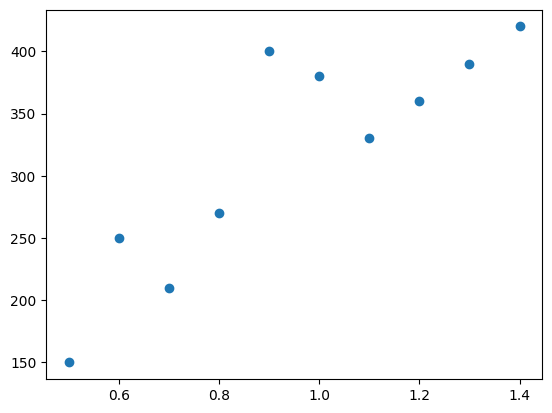

In [101]:
# Scatter plot
plt.scatter(X, y)
plt.show()

## **4. Linear Regression Theory**
We will use simple linear regression to model the relationship between the size of the house and its price. The linear regression model aims to fit a line that best represents the data, minimizing the difference between the actual prices and the predicted prices.

## **5. Model Implementation**
We will implement the linear regression model using the dataset represented in NumPy format. The steps include:

- Splitting the data into training and testing sets.
- Training the model to learn the relationship between the size of the house and its price.
- Making predictions using the trained model.

In [102]:
# Use 80% of dataset for training
training_set_x=X[:int(len(X)*0.8)]
training_set_y=y[:int(len(X)*0.8)]

**Compute the MSE**

In [103]:
def compute_mse(x,y,w,b):
    m = x.shape[0]
    cost = 0
    # using numpy properties
    cost = sum((w * x + b - y)**2)
    return 1 / (2 * m) * cost

**Compute the gradient descent**
To find the derivative of the costs

In [104]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]  # Number of training examples

    # Calculate the model's predictions for all training examples
    f_wb = w * x + b  # Vectorized operation

    # Compute the difference between predictions and actual values
    error = f_wb - y  # Vectorized operation

    # Calculate the gradients
    derivativeCostW = np.dot(error, x) / m  # Vectorized dot product for gradient w.r.t. w
    derivativeCostB = np.sum(error) / m     # Sum all errors for gradient w.r.t. b

    return derivativeCostW, derivativeCostB

**Gradient Descent**

Now that gradients can be computed, gradient descent, described in equation above can be implemented below in gradient_descent. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of  𝑤
  and  𝑏
  on the training data.

In [105]:
def gradient_descent(x, y, wInit, bInit, learningRate, num_iters, cost_function, gradient_function):
  w = wInit
  b = bInit
  # train the data here
  for i in range(num_iters):
        # Calculate the gradient
        gradientW, gradientB = gradient_function(x, y, w , b)
        # update the parameters using gradient_function
        w = w - learningRate * gradientW
        b = b - learningRate * gradientB
        # print every 10.000-th
        if i % 10000 == 0:
            cost = cost_function(x, y, w, b)
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}, gradientW {gradientW}, gradientB {gradientB}")
  return w, b # the results

In [106]:
# initial guess
w = 1
b = 1

iterations = 100000
learningRate = 0.05
w_final, b_final = gradient_descent(X,y,w,b,learningRate,iterations,compute_mse,compute_gradient)

Iteration 0: Cost 43474.92666703329, w 16.993250000000003, b 16.7025, gradientW -319.865, gradientB -314.05
Iteration 10000: Cost 914.3636363636359, w 261.81818176070277, b 67.2727273297543, gradientW -2.4463766123972165e-09, gradientB 2.4270917720059514e-09
Iteration 20000: Cost 914.3636363636368, w 261.8181818181734, b 67.27272727273541, gradientW -5.652367462971597e-13, gradientB 1.3642420526593923e-13
Iteration 30000: Cost 914.3636363636368, w 261.8181818181734, b 67.27272727273541, gradientW -5.652367462971597e-13, gradientB 1.3642420526593923e-13
Iteration 40000: Cost 914.3636363636368, w 261.8181818181734, b 67.27272727273541, gradientW -5.652367462971597e-13, gradientB 1.3642420526593923e-13
Iteration 50000: Cost 914.3636363636368, w 261.8181818181734, b 67.27272727273541, gradientW -5.652367462971597e-13, gradientB 1.3642420526593923e-13
Iteration 60000: Cost 914.3636363636368, w 261.8181818181734, b 67.27272727273541, gradientW -5.652367462971597e-13, gradientB 1.364242052659

# **6. Model Evaluation**
After training the model, we will evaluate its performance by calculating the Mean Squared Error (MSE). These metrics will help us understand how well the model predicts house prices based on their size.

In [107]:
print(f"Error: {compute_mse(X,y,w_final,b_final)}")
print(f"w: {w_final}\nb: {b_final}")

Error: 914.3636363636368
w: 261.8181818181734
b: 67.27272727273541


# **7. Visualizing the Regression Line**
We will plot the regression line over the scatter plot of the data to visually assess how well the model fits the relationship between house size and price.

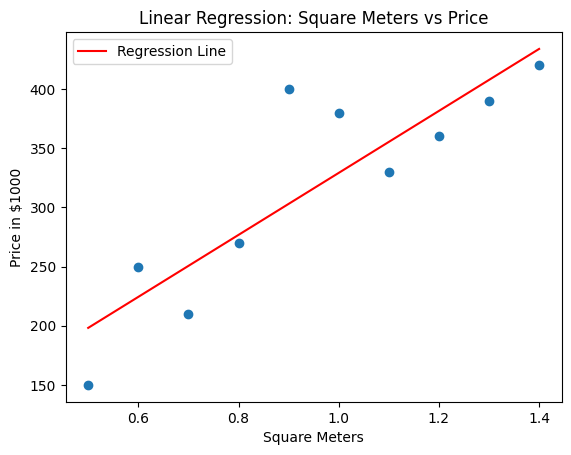

In [108]:
# Scatter plot
plt.scatter(X, y)
y_pred = w_final * X + b_final

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add labels and a title
plt.xlabel('Square Meters')
plt.ylabel('Price in $1000')
plt.title('Linear Regression: Square Meters vs Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()